Thanks to [Reference](https://towardsdatascience.com/deep-dive-into-principal-component-analysis-fc64347c4d20)

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv


In [3]:
df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df = df['label']
train_df = df.drop('label', axis = 1)

In [5]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
X = train_df.values
X_std = StandardScaler().fit_transform(X)

In [6]:
# Calculating Eigenvectors and eigenvalues of Cov matirx
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the eigenvalue, eigenvector pair from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

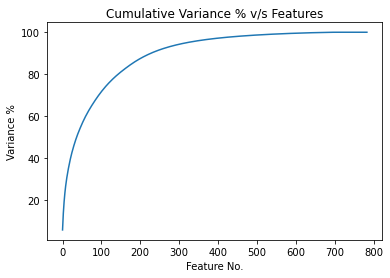

In [7]:
plt.plot(list(range(784)), cum_var_exp, label = 'Cumulative Variances')

plt.xlabel('Feature No.')
plt.ylabel('Variance %')
plt.title('Cumulative Variance % v/s Features')

plt.show()

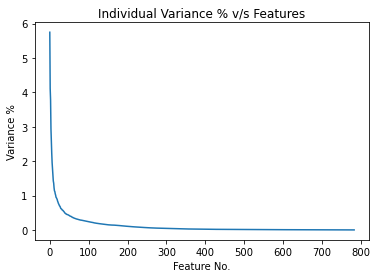

In [8]:
plt.plot(list(range(784)), var_exp, label = 'Individual Variances')

plt.xlabel('Feature No.')
plt.ylabel('Variance %')
plt.title('Individual Variance % v/s Features')

plt.show()

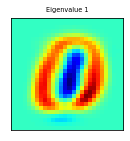

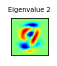

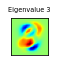

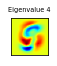

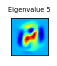

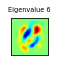

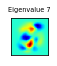

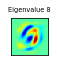

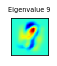

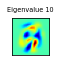

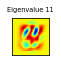

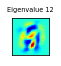

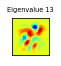

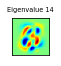

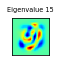

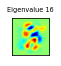

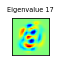

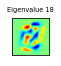

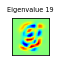

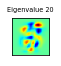

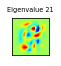

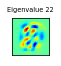

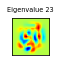

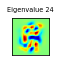

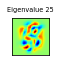

In [11]:
from sklearn.decomposition import PCA

n_components = 300
pca = PCA(n_components= n_components).fit(train_df.values)
eigenvalues = pca.components_

n_row = 5
n_col = 5

# Visualizing first 25 eigenvectors through their eigenvalues
plt.figure(figsize=(13,12))
for i in list(range(n_row * n_col)):
    offset =0
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(eigenvalues[i].reshape(28,28), cmap='jet')
    title_text = 'Eigenvalue ' + str(i + 1)
    plt.title(title_text, size=6.5)
    plt.xticks(())
    plt.yticks(())
    plt.show()

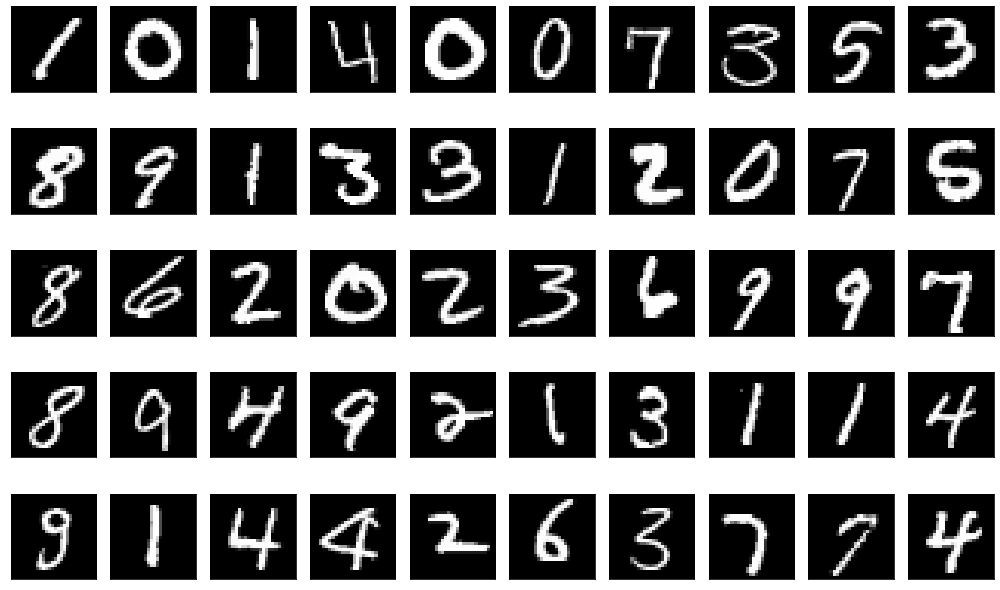

In [14]:
# plotting some numbers from the dataset
plt.figure(figsize=(14,12))

for digit_num in range(0,50):
    plt.subplot(7,10,digit_num+1)
    grid_data = train_df.iloc[digit_num].to_numpy().reshape(28,28)
    plt.imshow(grid_data, interpolation = "none", cmap = "gist_gray")
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()

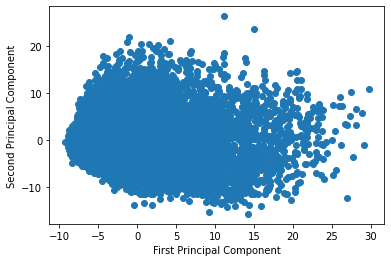

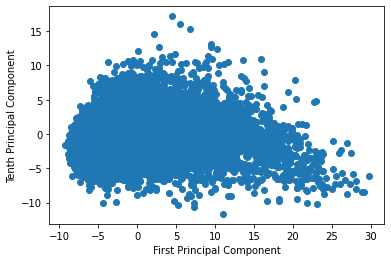

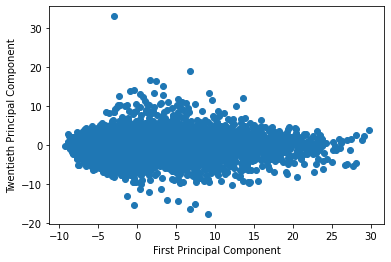

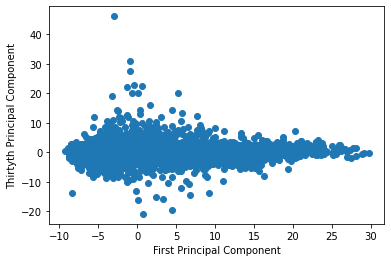

In [15]:
X = train_df[:10000].values

# Standardizing the values
X_std = StandardScaler().fit_transform(X)

# Call the PCA method with 30 components.
pca = PCA(n_components = 30)
pca.fit(X_std)
X_30d = pca.transform(X_std)
y = test_df[:10000].values

plt.scatter(X_30d[:,0], X_30d[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

plt.scatter(X_30d[:,0], X_30d[:,9])
plt.xlabel('First Principal Component')
plt.ylabel('Tenth Principal Component')
plt.show()

plt.scatter(X_30d[:,0], X_30d[:,19])
plt.xlabel('First Principal Component')
plt.ylabel('Twentieth Principal Component')
plt.show()

plt.scatter(X_30d[:,0], X_30d[:,29])
plt.xlabel('First Principal Component')
plt.ylabel('Thirtyth Principal Component')
plt.show()